# Optimización de hiperparámetros de modelos con OPTUNA

#### En esta notebook se realizó la optimización de hiperparámetros de los 4 modelos (KNN, Logistic regression, Naive Bayes, XGBoost) que se utilizaron para nuestro Model Stacking.

In [1]:

# Se importa el archivo utils.py con todo los ejecutables necesarios

from utils import *


In [2]:

#Leemos el archivo que se utilizará para estos modelos.

ocasiones_num = pd.read_csv("events_num_clean.csv")

ocasiones_num.head()


,Unnamed: 0,time,event_type,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,0,2,1,2,6.0,2.0,0,9.0,2.0,1,1.0
1,11,14,1,1,13.0,2.0,0,15.0,1.0,1,1.0
2,13,17,1,1,4.0,1.0,1,9.0,2.0,1,1.0
3,14,19,1,1,2.0,3.0,0,15.0,1.0,0,1.0
4,17,20,1,2,2.0,3.0,0,15.0,1.0,0,1.0


In [3]:

#Eliminamos las columnas innecesarias.

ocasiones_num.drop(columns="Unnamed: 0", inplace = True)
ocasiones_num.drop(columns="event_type", inplace = True)
ocasiones_num.head()


,time,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,2,6.0,2.0,0,9.0,2.0,1,1.0
1,14,1,13.0,2.0,0,15.0,1.0,1,1.0
2,17,1,4.0,1.0,1,9.0,2.0,1,1.0
3,19,1,2.0,3.0,0,15.0,1.0,0,1.0
4,20,2,2.0,3.0,0,15.0,1.0,0,1.0


In [4]:

#Aplicamos una normalización para no tener rangos numéricos tan altos.

X_norm = ocasiones_num.drop(columns=["is_goal"]).copy(deep=True)
scaler = preprocessing.MinMaxScaler()
names = X_norm.columns
d = scaler.fit_transform(X_norm)
scaled_X = pd.DataFrame(d, columns=names)
scaled_X.head()


,time,side,shot_place,shot_outcome,location,bodypart,assist_method,situation
0,0.02,1.0,0.416667,0.333333,0.375,0.5,0.25,0.0
1,0.14,0.0,1.000000,0.333333,0.750,0.0,0.25,0.0
2,0.17,0.0,0.250000,0.000000,0.375,0.5,0.25,0.0
3,0.19,0.0,0.083333,0.666667,0.750,0.0,0.00,0.0
4,0.20,1.0,0.083333,0.666667,0.750,0.0,0.00,0.0


In [5]:

#Se definen las variabes para nuestro X y nuestro objetivo

X = scaled_X
y = ocasiones_num["is_goal"].copy(deep=True)


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42)


### Optimización de Gaussian Naive Bayes

In [8]:

def objective_gnb(trial):
  params = {'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-8, 1.0)}
      
  gnbc = GaussianNB(**params) 
  gnbc.fit(X_train, y_train)

  y_test_pred = gnbc.predict(X_test)
  recall = recall_score(y_test, y_test_pred)


  return recall


In [9]:

#Se crea un "study" de Optuna en elq ue se define que en la métrica de RECALL se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective_gnb, n_trials=30)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    

[I 2022-11-25 12:43:03,610] A new study created in memory with name: no-name-7071735b-d768-41b7-b75c-582d64e84f7a
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-25 12:43:03,713] Trial 0 finished with value: 1.0 and parameters: {'var_smoothing': 0.00020453853998519012}. Best is trial 0 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-25 12:43:03,791] Trial 1 finished with value: 1.0 and parameters: {'var_smoothing': 6.073327847234406e-07}. Best is trial 0 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Tr

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-25 12:43:05,664] Trial 22 finished with value: 1.0 and parameters: {'var_smoothing': 0.00010362288924588377}. Best is trial 0 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-25 12:43:05,756] Trial 23 finished with value: 1.0 and parameters: {'var_smoothing': 0.00014354155293192083}. Best is trial 0 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-25 12:43:05,842] Trial 24 finished with value: 1.0 and parameters: {'var

Number of finished trials: 30
Best trial:
  Value: 1.0
  Params: 
    var_smoothing: 0.00020453853998519012


In [43]:

#Se crea un "study" de Optuna en el que se define que en la métrica de PRECISION se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective_gnb2, n_trials=250)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    

[I 2022-11-24 17:57:50,853] A new study created in memory with name: no-name-30808fda-9292-4519-a127-51d013f05cea
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:57:50,996] Trial 0 finished with value: 0.29586518415566365 and parameters: {'var_smoothing': 7.337907615726515e-08}. Best is trial 0 with value: 0.29586518415566365.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:57:51,154] Trial 1 finished with value: 0.29586518415566365 and parameters: {'var_smoothing': 6.791261242708233e-08}. Best is trial 0 with value: 0.29586518415566365.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

[I 2022-11-24 17:57:53,993] Trial 19 finished with value: 0.29586518415566365 and parameters: {'var_smoothing': 0.00031444136750883987}. Best is trial 16 with value: 0.6272566371681416.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:57:54,160] Trial 20 finished with value: 0.29586518415566365 and parameters: {'var_smoothing': 1.173971514293917e-06}. Best is trial 16 with value: 0.6272566371681416.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:57:54,324] Trial 21 finished with value: 0.6133133881824981 and parameters: {'var_smoothing': 0.05259316940523191}. Best is trial 16 with value: 0.6272566371681416.
suggest_loguniform has been deprecated in

[I 2022-11-24 17:57:57,211] Trial 39 finished with value: 0.4258395095617165 and parameters: {'var_smoothing': 0.010982489685085623}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:57:57,361] Trial 40 finished with value: 0.606651376146789 and parameters: {'var_smoothing': 0.05622668126421959}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:57:57,515] Trial 41 finished with value: 0.0 and parameters: {'var_smoothing': 0.252943937213533}. Best is trial

[I 2022-11-24 17:58:00,324] Trial 59 finished with value: 0.43859370028635064 and parameters: {'var_smoothing': 0.022644042892121064}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:00,492] Trial 60 finished with value: 0.6193984039287906 and parameters: {'var_smoothing': 0.09696927278240754}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:00,653] Trial 61 finished with value: 1.0 and parameters: {'var_smoothing': 0.1952194851894}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:58:03,653] Trial 80 finished with value: 0.0 and parameters: {'var_smoothing': 0.9712091691773708}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:03,822] Trial 81 finished with value: 1.0 and parameters: {'var_smoothing': 0.1930778003277047}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~o

[I 2022-11-24 17:58:06,826] Trial 99 finished with value: 0.4708943716268312 and parameters: {'var_smoothing': 0.02785750352693346}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:58:07,010] Trial 100 finished with value: 0.0 and parameters: {'var_smoothing': 0.7642965761189034}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:07,160] Trial 101 finished with value: 1.0 and parameters: {'var_smoothing': 0.19216249236541239}. Best is trial 34 with val

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:09,924] Trial 119 finished with value: 0.5741324921135647 and parameters: {'var_smoothing': 0.13455982270754058}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:10,085] Trial 120 finished with value: 1.0 and parameters: {'var_smoothing': 0.18971337158077953}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samp

[I 2022-11-24 17:58:12,901] Trial 138 finished with value: 1.0 and parameters: {'var_smoothing': 0.1785926563924618}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:13,056] Trial 139 finished with value: 0.29586518415566365 and parameters: {'var_smoothing': 6.217448327259311e-08}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:58:13,216] Trial 140 finished with value: 0.0 and parameters: {'var_smoothing': 0.43209914459843923}. Best is trial 34 with

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:15,954] Trial 158 finished with value: 1.0 and parameters: {'var_smoothing': 0.18009174966969235}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:16,109] Trial 159 finished with value: 0.5728 and parameters: {'var_smoothing': 0.13486703396507874}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:16,264] Trial 160 finished with value: 0.5911764705882353 and 

[I 2022-11-24 17:58:18,897] Trial 177 finished with value: 0.5728 and parameters: {'var_smoothing': 0.1349329364089992}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:58:19,051] Trial 178 finished with value: 0.0 and parameters: {'var_smoothing': 0.6152080543274062}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:19,197] Trial 179 finished with value: 0.6102535832414554 and parameters: {'var_smoothing': 0.09127524668499624}. Best is trial 34 with 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:21,960] Trial 197 finished with value: 0.5742444152431012 and parameters: {'var_smoothing': 0.12998035347306258}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:22,112] Trial 198 finished with value: 0.9117647058823529 and parameters: {'var_smoothing': 0.1547109977087482}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:25,072] Trial 217 finished with value: 0.6204588910133844 and parameters: {'var_smoothing': 0.11110943759469186}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:58:25,234] Trial 218 finished with value: 0.0 and parameters: {'var_smoothing': 0.4632003303392739}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

[I 2022-11-24 17:58:28,001] Trial 236 finished with value: 0.609860664523044 and parameters: {'var_smoothing': 0.08881669598271248}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-11-24 17:58:28,167] Trial 237 finished with value: 0.6013437849944009 and parameters: {'var_smoothing': 0.12106784853636113}. Best is trial 34 with value: 1.0.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
[I 2022-11-24 17:58:28,318] Trial 238 finished with value: 0.0 and parameters: {'var_smoothing': 0.283772821283307}. Best is tri

Number of finished trials: 250
Best trial:
  Value: 1.0
  Params: 
    var_smoothing: 0.17041873547321018


#### Se selecciona el valor para el parámetro var_smoothing = 0.016269942917168455.
#### Se tomó la desición de elegir este valor que no es el valor de las optimizaciones para maximizar recall o precision debido a que si el valor de recall es = 1.0, el de precision baja a menos de 0.30, por lo tanto elegimos un valor medio en el que ambas métricas se encuentran más balanceadas.

In [7]:
#Se hace la pruba del modelo con el parámetro optimizado.

nbc = GaussianNB(var_smoothing = 0.016269942917168455)


In [8]:

nbc.fit(X_train, y_train)


GaussianNB(var_smoothing=0.016269942917168455)

In [46]:

#Predict with naive Bayes

#Se generan las variables para la predicción
y_train_pred = nbc.predict(X_train) #Prediccion en Train
y_test_pred = nbc.predict(X_test) #Prediccion en Test


In [47]:

#Calculo el Recall en Train
train_precision = recall_score(y_train, y_train_pred)

#Calculo el Recall en Test
test_precision = recall_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.5449931069056273
% de aciertos sobre el set de evaluación: 0.5422783323546683


In [49]:

#Calculo el Recall en Train
train_precision = precision_score(y_train, y_train_pred)

#Calculo el Recall en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.4255100543079407
% de aciertos sobre el set de evaluación: 0.4212566997377124


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


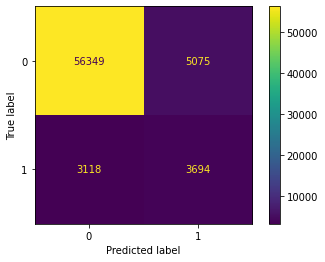

In [48]:

#matriz de confusión del set de test

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(nbc, X_test, y_test)
plt.show()


 ### Optimización de Random Forest

In [22]:

#Se crea un "study" de Optuna en el que se define que en la métrica de Recall se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective_rfc, n_trials=30)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    

[I 2022-11-23 19:47:10,846] A new study created in memory with name: no-name-1acf697d-3e32-4f3a-8a33-c04f9201aa4f
[I 2022-11-23 19:48:26,949] Trial 0 finished with value: 0.5344979448032883 and parameters: {'n_estimators': 497, 'max_depth': 39, 'min_samples_split': 121, 'min_samples_leaf': 58}. Best is trial 0 with value: 0.5344979448032883.
[I 2022-11-23 19:49:14,182] Trial 1 finished with value: 0.5480035231943629 and parameters: {'n_estimators': 295, 'max_depth': 41, 'min_samples_split': 43, 'min_samples_leaf': 43}. Best is trial 1 with value: 0.5480035231943629.
[I 2022-11-23 19:50:13,737] Trial 2 finished with value: 0.5299471520845567 and parameters: {'n_estimators': 395, 'max_depth': 31, 'min_samples_split': 121, 'min_samples_leaf': 58}. Best is trial 1 with value: 0.5480035231943629.
[I 2022-11-23 19:50:20,920] Trial 3 finished with value: 0.29638872577803876 and parameters: {'n_estimators': 62, 'max_depth': 5, 'min_samples_split': 120, 'min_samples_leaf': 16}. Best is trial 1 

Number of finished trials: 30
Best trial:
  Value: 0.5675278919553729
  Params: 
    n_estimators: 299
    max_depth: 15
    min_samples_split: 67
    min_samples_leaf: 5


### Optimización de Logistic Regression

In [10]:

def objective_lgro(trial):

  params = {'tol': trial.suggest_float('tol',1e-6, 1e-3),
            'C': trial.suggest_float('C',0.01,1),
            'solver': 'liblinear',
            'penalty' : 'l2',
           }
  
      
  lgro = LogisticRegression(**params) 
  lgro.fit(X_train, y_train)

  y_test_pred = lgro.predict(X_test)
  recall = recall_score(y_test, y_test_pred)


  return recall

In [12]:

#Se crea un "study" de Optuna en el que se define que en la métrica de Recall se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective_lgro, n_trials=100)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    

[I 2022-11-25 12:45:36,373] A new study created in memory with name: no-name-d605a8d5-bf00-4ce4-83b2-5476131b7e5b
[I 2022-11-25 12:45:37,032] Trial 0 finished with value: 0.29448032883147385 and parameters: {'tol': 1.385824796854509e-05, 'C': 0.23950744210381122}. Best is trial 0 with value: 0.29448032883147385.
[I 2022-11-25 12:45:37,666] Trial 1 finished with value: 0.29638872577803876 and parameters: {'tol': 0.0003214091959741262, 'C': 0.6658943724766175}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:45:38,190] Trial 2 finished with value: 0.26145038167938933 and parameters: {'tol': 0.00021441645745206786, 'C': 0.09108743219971938}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:45:38,823] Trial 3 finished with value: 0.29638872577803876 and parameters: {'tol': 0.00027909307675890506, 'C': 0.7470976070228865}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:45:39,460] Trial 4 finished with value: 0.29638872577803876 and param

[I 2022-11-25 12:46:00,114] Trial 38 finished with value: 0.29638872577803876 and parameters: {'tol': 0.0006541603152637775, 'C': 0.5766551323666785}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:00,717] Trial 39 finished with value: 0.29638872577803876 and parameters: {'tol': 0.0005193587212081206, 'C': 0.40918572839529066}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:01,436] Trial 40 finished with value: 0.29638872577803876 and parameters: {'tol': 0.00010042625967983841, 'C': 0.4062953422487724}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:02,042] Trial 41 finished with value: 0.29638872577803876 and parameters: {'tol': 0.0007424494064744728, 'C': 0.8924175077361508}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:02,725] Trial 42 finished with value: 0.29638872577803876 and parameters: {'tol': 0.00019671580188509747, 'C': 0.9400596807171702}. Best is trial 1 with value: 0.2963887257780387

[I 2022-11-25 12:46:24,354] Trial 77 finished with value: 0.29638872577803876 and parameters: {'tol': 0.000850900198678279, 'C': 0.7256830704963529}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:24,972] Trial 78 finished with value: 0.29638872577803876 and parameters: {'tol': 0.00029645892894618103, 'C': 0.781417692164528}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:25,631] Trial 79 finished with value: 0.29638872577803876 and parameters: {'tol': 0.0006952972347192773, 'C': 0.7110718109426296}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:26,255] Trial 80 finished with value: 0.29638872577803876 and parameters: {'tol': 0.0007642725739056792, 'C': 0.7574698272666569}. Best is trial 1 with value: 0.29638872577803876.
[I 2022-11-25 12:46:26,868] Trial 81 finished with value: 0.29638872577803876 and parameters: {'tol': 0.00037287470324366164, 'C': 0.6557507946212205}. Best is trial 1 with value: 0.29638872577803876.


Number of finished trials: 100
Best trial:
  Value: 0.29638872577803876
  Params: 
    tol: 0.0003214091959741262
    C: 0.6658943724766175


### Optimización de KNN

In [17]:
#OPTUNA FOR KNN

def objective_knn(trial):
  params = {"n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
            "weights" : trial.suggest_categorical("weights", ['uniform', 'distance']),
            "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
           }
      
  knno = KNeighborsClassifier (**params) 
  knno.fit(X_train, y_train)

  y_test_pred = knno.predict(X_test)
  recall = recall_score(y_test, y_test_pred)


  return recall

In [19]:

#Se crea un "study" de Optuna en el que se define que en la métrica de Recall se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective_knn, n_trials=30)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    

[I 2022-11-25 12:59:44,283] A new study created in memory with name: no-name-e43b749b-0596-4fc0-b143-987515ee76a1
[I 2022-11-25 12:59:53,741] Trial 0 finished with value: 0.511303581914269 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.511303581914269.
[I 2022-11-25 13:00:04,509] Trial 1 finished with value: 0.4994128009395185 and parameters: {'n_neighbors': 29, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.511303581914269.
[I 2022-11-25 13:00:16,359] Trial 2 finished with value: 0.48561362301820316 and parameters: {'n_neighbors': 26, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.511303581914269.
[I 2022-11-25 13:00:25,481] Trial 3 finished with value: 0.5576923076923077 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 3 with value: 0.5576923076923077.
[I 2022-11-25 13:00:36,341] Trial 4 finished with value: 0.52583

Number of finished trials: 30
Best trial:
  Value: 0.5736934820904287
  Params: 
    n_neighbors: 1
    weights: distance
    metric: minkowski


### Optimización de XGBoost

In [20]:

#OPTUNA FOR XGBoost

def objective_xgbc(trial):
  params = {'max_depth': trial.suggest_int('max_depth', 1, 9),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
            'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
            'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
            'eval_metric': 'mlogloss',
            'use_label_encoder': False,
           }
      
  xgbc = xgb.XGBClassifier(**params) 
  xgbc.fit(X_train, y_train)

  y_test_pred = xgbc.predict(X_test)
  recall = recall_score(y_test, y_test_pred)


  return recall


In [22]:

#Se crea un "study" de Optuna en el que se define que en la métrica de Recall se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective_xgbc, n_trials=30)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2022-11-25 13:13:35,776] A new study created in memory with name: no-name-e211295f-d935-4efd-9aed-e78bd19526fb
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be rem

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_f

Number of finished trials: 30
Best trial:
  Value: 0.611714621256606
  Params: 
    max_depth: 4
    learning_rate: 0.0785858371876157
    n_estimators: 204
    min_child_weight: 7
    gamma: 1.7429061413938068e-06
    subsample: 0.9829229874843859
    colsample_bytree: 0.5737440300286447
    reg_alpha: 4.18628505185347e-08
    reg_lambda: 1.0970876089085785e-05


### Utilizando los valores obtenidos con estas optimizaciones, se evaluaran los modelos y además se hará un stacking con dichos modelos optimizados.